In [266]:
# Steven Pham
# Hw # 7  - Distinguishing Sentiments

# Twitter Analysis on Media Sources (Last 100 Tweets)

- It can be inferred that a majority of tweets from each station are neutral. There is a large number of tweets on the scatterplot that follows the center point (at 0).


- Despite some neutrality among stations - CBS seems to have more positive tweets than any other stations. The bar plot for CBS tops the highest at 0.332, followed by BBC at 0.179.


- Besides the neutrality among stations on the scatterplot, there is no clear or discernible patter for the last 100 tweets from each station. 


- Limitations to note: 
    - This analysis is only applicable to this point in time - as any "big" news can quickly swing the values in the plot around. 
    - VADER analysis is limited - it does not deal well with ambiguous or sarcastic text. 
    - There is also quite a few of texts that has unique emoticons (which pandas/VADER cannot properly read here), which could heavily influence how the text could be interpreted

In [267]:
# Dependencies
import pandas as pd
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime 
import yaml

# YAML set up to protect twitter keys
with open("./config.yaml") as y:
    config = yaml.load(y)

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "FTnlycXaskt97cX1lILL5hvEU"
access_token = "15177438-4vwpB12VWYxuoKmAxDSBUafv2n3QrbejrwA5q0qBa"

# Loading YAML settings for Secret
consumer_secret = config['consec']
access_token_secret = config['accsec']

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [268]:
# Target Search Term
news_station_list = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")
news_station_compound = []
counter = 0

In [269]:
for news_station in news_station_list:

    news_tweets = api.user_timeline(news_station, count=100, result_type="recent")


    print("========================")
    print("Results for: " +str(news_station))
    print("========================")

    for tweets in news_tweets:

        compound = analyzer.polarity_scores(tweets["text"])["compound"]
        pos = analyzer.polarity_scores(tweets["text"])["pos"]
        neu = analyzer.polarity_scores(tweets["text"])["neu"]
        neg = analyzer.polarity_scores(tweets["text"])["neg"]

        print(news_station + " | Time: " + tweets["created_at"])
        print("# " +str(counter) +" Tweet: " + tweets["text"])
        print("Compound: " +str(compound) + " | Pos: " +str(pos) +" | Neu: " +str(neu) +" | Neg: " +str(neg) +"\n")

        news_station_compound.append({"News Org": news_station, "Created": tweets["created_at"],
                                      "Compound": compound, "#": counter,
                                     "Positive": pos, "Negative": neg, "Neutral": neu,  "Tweet": tweets["text"]})
        
        counter = counter + 1

    print("========================")
    print("End Results for " +str(news_station))
    print("======================== \n")
    
    counter = 0

Results for: @BBC
@BBC | Time: Thu Mar 08 20:33:04 +0000 2018
# 0 Tweet: Jack Jarvis and Victor McDade are back for another hilarious six-part series. 

#StillGame | 9:30pm | @BBCOne |… https://t.co/zFtd4VQyKL
Compound: 0.4019 | Pos: 0.144 | Neu: 0.856 | Neg: 0.0

@BBC | Time: Thu Mar 08 20:03:04 +0000 2018
# 1 Tweet: Lucy and Lee are back! 🙌🎉

#NotGoingOut | 9pm | @BBCOne | https://t.co/dUnnFaIoci https://t.co/gSpTMCPrSC
Compound: 0.0 | Pos: 0.0 | Neu: 1.0 | Neg: 0.0

@BBC | Time: Thu Mar 08 18:00:06 +0000 2018
# 2 Tweet: What advice would YOU give your younger self? 🤔

#InternationalWomensDay #IWD2018 https://t.co/vIwPLtzTbO
Compound: 0.0 | Pos: 0.0 | Neu: 1.0 | Neg: 0.0

@BBC | Time: Thu Mar 08 17:30:11 +0000 2018
# 3 Tweet: In recognition of International Women’s Day, a playlist in celebration of the funniest, saddest and most significan… https://t.co/4WCrxvJxFY
Compound: -0.1027 | Pos: 0.159 | Neu: 0.664 | Neg: 0.177

@BBC | Time: Thu Mar 08 17:00:09 +0000 2018
# 4 Tweet: 🔬 More t

Compound: -0.4215 | Pos: 0.0 | Neu: 0.781 | Neg: 0.219

@BBC | Time: Tue Mar 06 18:03:04 +0000 2018
# 55 Tweet: Every day around the UK, an army of unpaid volunteers put their lives on the line to try and save complete stranger… https://t.co/W3Fel1iPSK
Compound: 0.4939 | Pos: 0.127 | Neu: 0.873 | Neg: 0.0

@BBC | Time: Tue Mar 06 17:30:07 +0000 2018
# 56 Tweet: Impressive and terrifying in equal measure. 

This woman doesn't just sleepwalk... she sleep-drives too. https://t.co/Ovwb4dNaYJ
Compound: -0.1027 | Pos: 0.165 | Neu: 0.65 | Neg: 0.185

@BBC | Time: Tue Mar 06 17:25:44 +0000 2018
# 57 Tweet: RT @bbcwritersroom: New #Brexit #comedy Soft Border Patrol is set on the border between #NorthernIreland and the Republic of #Ireland. We p…
Compound: 0.0 | Pos: 0.0 | Neu: 1.0 | Neg: 0.0

@BBC | Time: Tue Mar 06 17:02:04 +0000 2018
# 58 Tweet: 🐧 Scientists have stumbled across a huge group of previously unknown Adélie penguins on the most northerly point of… https://t.co/3GQ8PlQyMY
Compound

Compound: 0.0 | Pos: 0.0 | Neu: 1.0 | Neg: 0.0

@CBS | Time: Tue Feb 06 17:05:49 +0000 2018
# 54 Tweet: RT @thegoodfight: There's no season like lawyer season. #TheGoodFight returns March 4, exclusively on CBS All Access. https://t.co/XAlrg1nB…
Compound: 0.0772 | Pos: 0.121 | Neu: 0.773 | Neg: 0.106

@CBS | Time: Sun Feb 04 15:35:36 +0000 2018
# 55 Tweet: RT @thegoodfight: The acclaimed series returns in 1 month. #TheGoodFight is back Sunday, March 4. https://t.co/5BNLTYRd8p https://t.co/yInP…
Compound: 0.0 | Pos: 0.0 | Neu: 1.0 | Neg: 0.0

@CBS | Time: Sun Feb 04 12:00:01 +0000 2018
# 56 Tweet: .@KeshaRose's emotional performance with @CyndiLauper, @AndraDayMusic, @BebeRexha and @Camila_Cabello brought the a… https://t.co/qpgS2e9ir0
Compound: 0.1531 | Pos: 0.118 | Neu: 0.882 | Neg: 0.0

@CBS | Time: Sat Feb 03 23:11:43 +0000 2018
# 57 Tweet: Broadway legend Patti LuPone paid tribute to Sir Andrew Lloyd Webber with a show-stopping rendition of the iconic s… https://t.co/GxqLtUzhFP
Comp

Compound: 0.0 | Pos: 0.0 | Neu: 1.0 | Neg: 0.0

@CNN | Time: Thu Mar 08 13:07:38 +0000 2018
# 58 Tweet: Fred Guttenberg, whose daughter died in the Florida school shooting, rips new NRA ad: "If this was put out by a ter… https://t.co/mYfIHC8pOw
Compound: -0.5574 | Pos: 0.0 | Neu: 0.854 | Neg: 0.146

@CNN | Time: Thu Mar 08 12:50:05 +0000 2018
# 59 Tweet: The controversial statue that critics have deemed as "San Francisco's monument to white supremacy" is coming off it… https://t.co/yKIpBEV3ja
Compound: -0.4215 | Pos: 0.057 | Neu: 0.755 | Neg: 0.189

@CNN | Time: Thu Mar 08 12:40:11 +0000 2018
# 60 Tweet: 'I never told anyone': 5 women's stories of sexual abuse at the Hajj #AsEquals https://t.co/29od5ZBFRv https://t.co/KvJSZCbKyg
Compound: -0.6369 | Pos: 0.0 | Neu: 0.769 | Neg: 0.231

@CNN | Time: Thu Mar 08 12:32:00 +0000 2018
# 61 Tweet: Tybre Faw traveled 7 hours to see his hero, Dem. Rep. John Lewis, who was in Selma, Alabama, to commemorate the 196… https://t.co/IItXisEVsJ
Compound

# 73 Tweet: Israeli Prime Minister @Netanyahu attends the opening of a special exhibit at the @UN celebrating 3,000 years of Je… https://t.co/0knlzJjJHX
Compound: 0.7506 | Pos: 0.274 | Neu: 0.726 | Neg: 0.0

@FoxNews | Time: Thu Mar 08 16:33:33 +0000 2018
# 74 Tweet: 53-year-old man allegedly stabs deputy, hurts another in California https://t.co/YJlcB4Z4w3 #FoxNewsUS
Compound: -0.7184 | Pos: 0.0 | Neu: 0.6 | Neg: 0.4

@FoxNews | Time: Thu Mar 08 16:28:51 +0000 2018
# 75 Tweet: Army sets sights on new sniper rifle https://t.co/8FOgpH1cAw
Compound: 0.0 | Pos: 0.0 | Neu: 1.0 | Neg: 0.0

@FoxNews | Time: Thu Mar 08 16:20:25 +0000 2018
# 76 Tweet: Earlier today, @FLOTUS tweeted her celebration of #InternationalWomensDay. https://t.co/Y6vcQ2BinE https://t.co/TZUJXaFz79
Compound: 0.0 | Pos: 0.0 | Neu: 1.0 | Neg: 0.0

@FoxNews | Time: Thu Mar 08 16:13:57 +0000 2018
# 77 Tweet: U.S., South Korean intelligence probe reports of Kim Jong Un health woes - via @HollieSMcKay https://t.co/SX4N99MNIF


# 14 Tweet: Peter Thiel, Silicon Valley’s iconoclast, argues that the anger being turned on Facebook is less about Russia and m… https://t.co/M001mevhc5
Compound: -0.743 | Pos: 0.0 | Neu: 0.741 | Neg: 0.259

@nytimes | Time: Thu Mar 08 18:45:07 +0000 2018
# 15 Tweet: RT @MaggieAstor: The Florida legislature passed its first gun control bill in years. Here's what's in it. https://t.co/NA0srjqxYA
Compound: -0.34 | Pos: 0.0 | Neu: 0.876 | Neg: 0.124

@nytimes | Time: Thu Mar 08 18:35:08 +0000 2018
# 16 Tweet: Adam Rippon: "I kind of have a feeling that I’ve used the Olympics to get myself to meet the world" https://t.co/jycpwaju5R
Compound: 0.128 | Pos: 0.073 | Neu: 0.927 | Neg: 0.0

@nytimes | Time: Thu Mar 08 18:25:03 +0000 2018
# 17 Tweet: Cigna struck a big deal for Express Scripts. Here's what it reveals about health care. https://t.co/fm175MQ0TQ
Compound: 0.296 | Pos: 0.176 | Neu: 0.714 | Neg: 0.11

@nytimes | Time: Thu Mar 08 18:15:07 +0000 2018
# 18 Tweet: RT @nytopinion: The next

In [270]:
# Placing results into DF
news_np = pd.DataFrame.from_dict(news_station_compound)

# Reorganizing Columns
news_np = news_np[["#", "News Org", "Created", "Positive", "Neutral", "Negative", "Compound", "Tweet"]]

# Outputting to CSV
# Will be weird encoding - some tweets uses emoticons
news_np.to_csv('news_df.csv', encoding='utf-8')

# Output head
news_np.head()

,#,News Org,Created,Positive,Neutral,Negative,Compound,Tweet
0,0,@BBC,Thu Mar 08 20:33:04 +0000 2018,0.144,0.856,0.000,0.4019,Jack Jarvis and Victor McDade are back for ano...
1,1,@BBC,Thu Mar 08 20:03:04 +0000 2018,0.000,1.000,0.000,0.0000,Lucy and Lee are back! 🙌🎉\n\n#NotGoingOut | 9p...
2,2,@BBC,Thu Mar 08 18:00:06 +0000 2018,0.000,1.000,0.000,0.0000,What advice would YOU give your younger self? ...
3,3,@BBC,Thu Mar 08 17:30:11 +0000 2018,0.159,0.664,0.177,-0.1027,"In recognition of International Women’s Day, a..."
4,4,@BBC,Thu Mar 08 17:00:09 +0000 2018,0.000,1.000,0.000,0.0000,🔬 More than half of the UK can't name a famous...


In [271]:
# To assist with easier legend generation
# Seperating results via news organizations
bbc_compound = news_np.loc[news_np['News Org'] == '@BBC']
cbs_compound = news_np.loc[news_np['News Org'] == '@CBS']
cnn_compound = news_np.loc[news_np['News Org'] == '@CNN']
fox_compound = news_np.loc[news_np['News Org'] == '@FoxNews']
ny_compound = news_np.loc[news_np['News Org'] == '@nytimes']

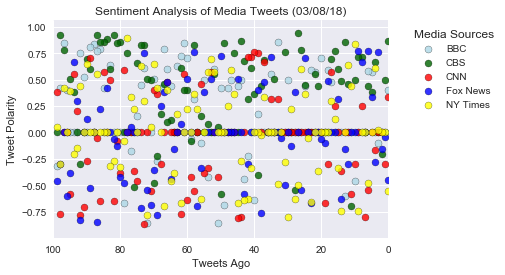

In [272]:
import seaborn as sns
sns.set()

# Reversing time
plt.xlim(100, 0)

# Creating scatter plot for each news station
# X = twitter counter, Y = compound value
plt.scatter(bbc_compound["#"],
         bbc_compound["Compound"], c = "lightblue", 
         edgecolor = "black", alpha = .8,
         label = "BBC")

plt.scatter(cbs_compound["#"],
         cbs_compound["Compound"], c = "darkgreen", 
         edgecolor = "black", alpha = .8,
         label = "CBS")

plt.scatter(cnn_compound["#"],
         cnn_compound["Compound"], c = "red",
         edgecolor = "black", alpha = .8,
         label = "CNN")

plt.scatter(fox_compound["#"],
         fox_compound["Compound"], c = "blue", 
         edgecolor = "black", alpha = .8,
         label = "Fox News")

plt.scatter(ny_compound["#"],
         ny_compound["Compound"], c = "yellow", 
         edgecolor = "black", alpha = .8,
         label = "NY Times")

# Title includes current time
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")))

# X/Y Labels
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

# legend on the sidebar
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title = "Media Sources")

# Output graph
plt.show()

In [273]:
# Grouping and avging results into a new DF
compound_avg = news_np.groupby('News Org', as_index=False)['Compound'].mean()
compound_avg

,News Org,Compound
0,@BBC,0.178729
1,@CBS,0.332212
2,@CNN,-0.046430
3,@FoxNews,-0.014876
4,@nytimes,0.004971


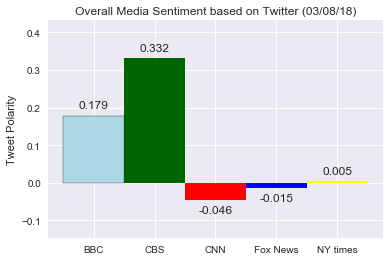

In [274]:
# Bar Chart

# Setting up color coding
color_map = compound_avg["News Org"].map({"@BBC": "lightblue", 
                                        "@CBS": "darkgreen", "@CNN": "red", 
                                        "@FoxNews": "blue", "@nytimes": "yellow"})

# Setting up bar chart: x = news, y = compound avg, color mapping
bar = plt.bar(compound_avg["News Org"], compound_avg["Compound"], 
              color= color_map, 
              edgecolor = "black", width = 1)

# X axis heading setup
tick_locations = [i for i in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "Fox News", "NY times"])


# Setting up y limits - taking +/- .10 of min/max of compound avg
plt.ylim(( min(compound_avg["Compound"]) - .10 ), max(compound_avg["Compound"] + .10))


## Adding values above bars 
news_bar = bar.patches

for bars in news_bar:
    # Get X and Y placement of label from rect
    y_value = bars.get_height()
    x_value = bars.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
        va = 'top'

    # Use Y value as label and format number with three decimal place
    label = "{:.3f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.

# Labels
plt.title("Overall Media Sentiment based on Twitter (%s)" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")

# Output with SNS
sns.set()
plt.show()